# EMPLOYEE_RETENTION
LEFT OR EMPLOYEED

# IMPORT 

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split # Scikit-Learn 0.18+
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# EXAMINE DATA

In [2]:
df = pd.read_csv('../Employee_retention/employee_data.csv')
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [3]:
df.tail()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0
14248,159,NaN,NaN,0.578742,3,NaN,medium,0.808850,Employed,3.0


In [4]:
df.shape

(14249, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
avg_monthly_hrs      14249 non-null int64
department           13540 non-null object
filed_complaint      2058 non-null float64
last_evaluation      12717 non-null float64
n_projects           14249 non-null int64
recently_promoted    300 non-null float64
salary               14249 non-null object
satisfaction         14068 non-null float64
status               14249 non-null object
tenure               14068 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [7]:
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

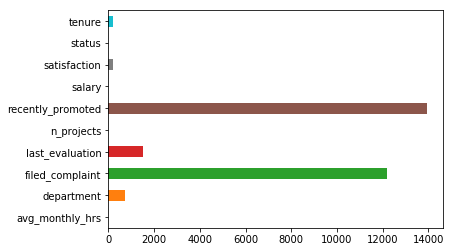

In [8]:
nullvalues = df.isnull().sum()
nullvalues.plot.barh()

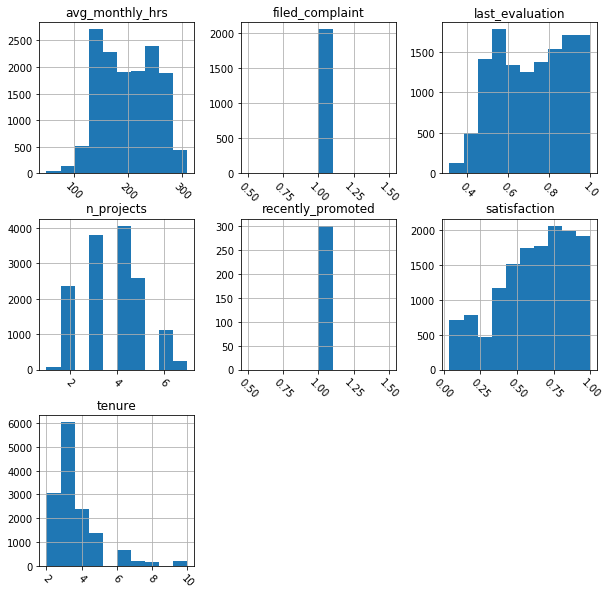

In [9]:
# Plotting histogram for numeric distributions 
df.hist(figsize=(10,10), xrot = -45)
plt.show()

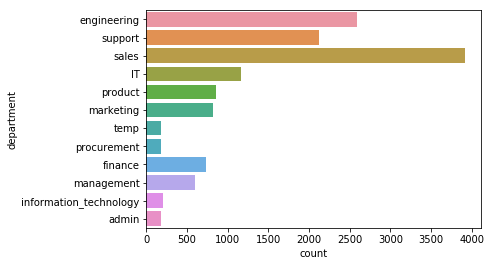

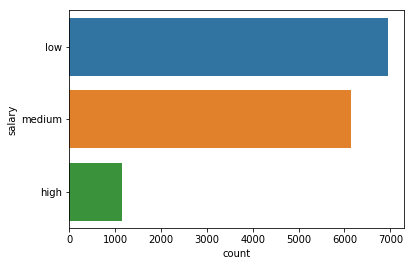

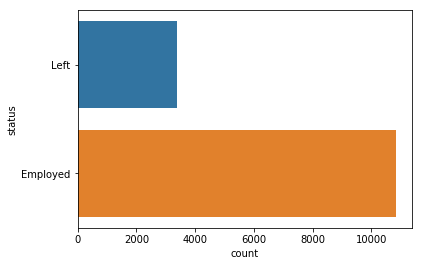

In [10]:
# # Plotting bar graphs for categorical distributions 
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

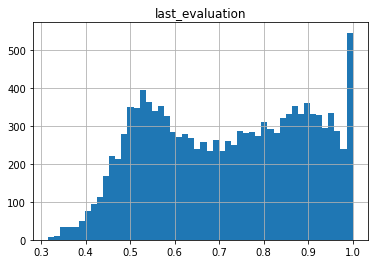

In [11]:
# Just getting comfortable with matplotlib
df.hist('last_evaluation',bins=50);

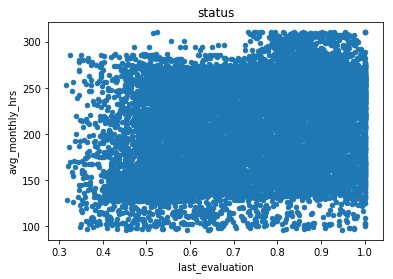

In [12]:
# Just getting comfortable with matplotlib
df.plot(x='last_evaluation', y='avg_monthly_hrs',
        title='status', kind='scatter')

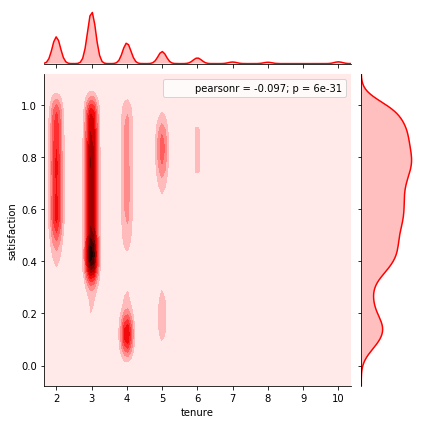

In [13]:
# jointplot showing the kde distributions of satisfication vs. tenure
sns.jointplot(x='tenure',y='satisfaction',data=df,color='red',kind='kde');

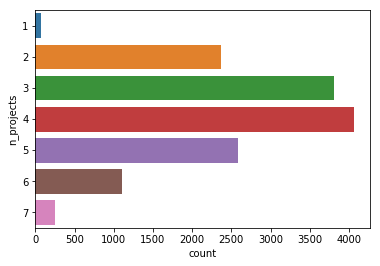

In [14]:
# Just getting comfortable with Seaborn
sns.countplot(y='n_projects', data = df)

# CORRELATIONS 

In [15]:
correlations = df.corr()

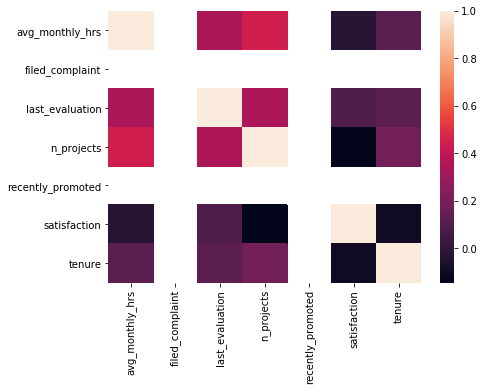

In [16]:
plt.subplots(figsize=(7,5))
sns.heatmap(correlations)

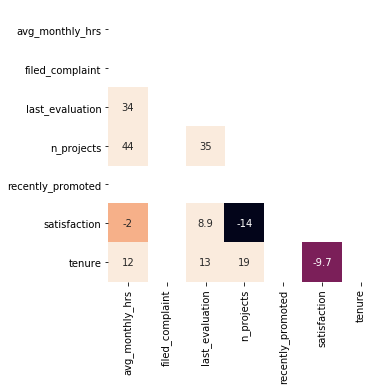

In [17]:
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(10,5))
sns.axes_style("white")
sns.heatmap(correlations * 100, annot= True, mask=mask,
                 vmax=.3, square=True, cbar=False)

# Segmentation
Cutting data to observe the relationship between categorical and numeric features

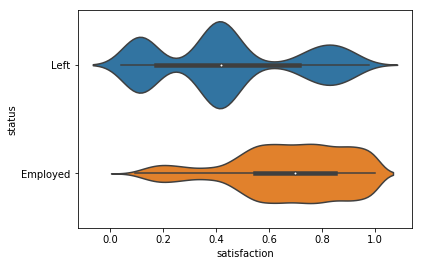

In [18]:
# Segment satisfaction by status
sns.violinplot(y = 'status', x = 'satisfaction', data = df)

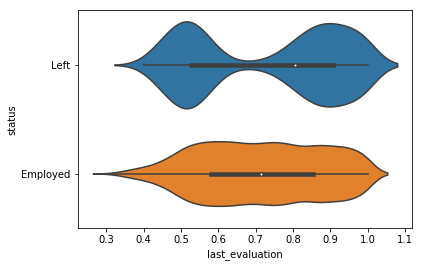

In [19]:
# Segment last_evaluation by status
sns.violinplot(y = 'status', x = 'last_evaluation', data = df)

In [20]:
# Segment by status and display the means within each class
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,1.0,0.714479,3.755273,1.0,0.675979,3.380245
Left,206.502948,1.0,0.730706,3.833137,1.0,0.447500,3.869023


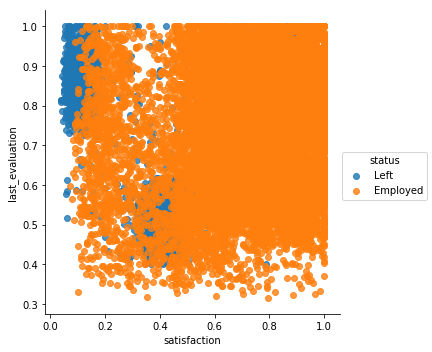

In [21]:
# Since target is status (categorical) will do extra segmentation
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(x='satisfaction', y='last_evaluation', hue='status',
           data=df, fit_reg=False)

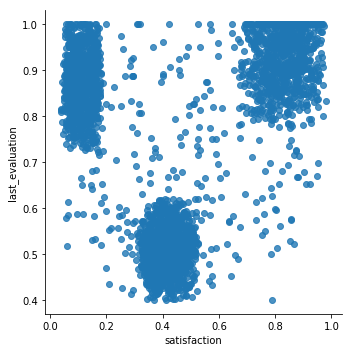

In [22]:
# # Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction', y='last_evaluation',
           data=df[df.status == 'Left'], fit_reg=False)

# DATA CLEANING

In [23]:
# Dropping duplicates
# Were only a few
df = df.drop_duplicates()
df.shape

(14221, 10)

In [24]:
# Looking at classes of department
list(df.department.unique())

['engineering',
 'support',
 'sales',
 'IT',
 'product',
 'marketing',
 'temp',
 'procurement',
 'finance',
 nan,
 'management',
 'information_technology',
 'admin']

In [25]:
# I will drop temporary workers 
df = df[df.department != 'temp']
df.shape

(14068, 10)

In [26]:
# unique values for filed_complaint
df.filed_complaint.unique()

array([nan,  1.])

In [27]:
df['filed_complaint'] = df.filed_complaint.fillna(0)

In [28]:
# check results 
df.filed_complaint.unique()

array([0., 1.])

In [29]:
# unique values for recently promoted
df.recently_promoted.unique()

array([nan,  1.])

In [30]:
df['recently_promoted'] = df.recently_promoted.fillna(0)

In [31]:
# check results 
df.recently_promoted.unique()

array([0., 1.])

In [32]:
# I will replace information technology with IT
df.department.replace('information_technology', 'IT',
                      inplace =True)

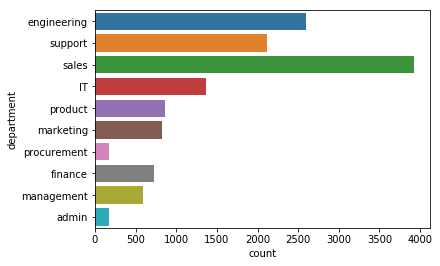

In [33]:
# plot results
sns.countplot(y = 'department', data = df)

In [34]:
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

In [35]:
# I will just replace nan values with missing for department
df['department'].fillna('Missing', inplace = True)

In [36]:
# create new  variable for missing last_evaluation
# astype converts 
df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)

In [37]:
# Fill missing values with 0 for last evaluation
df.last_evaluation.fillna(0 , inplace = True)

In [38]:
#checking work
df.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
dtype: int64

In [39]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,last_evaluation_missing
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,0
1,232,support,0.0,0.000000,3,0.0,low,0.834544,Employed,2.0,1
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,0


# FEATURE ENGINEERING

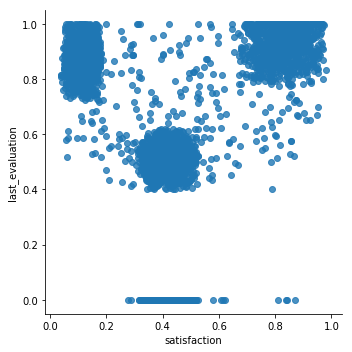

In [40]:
# Looking Scatterplot of satisfaction vs. last_evaluation again
# for only those who have left
# To try and engineer
sns.lmplot(x='satisfaction', y='last_evaluation',
           data=df[df.status == 'Left'], fit_reg=False)

In [41]:
# I can engineer these findings 
df['underperformer'] = ((df.last_evaluation < 0.6) & 
                        (df.last_evaluation_missing == 0)).astype(int)
df['unhappy'] = (df.satisfaction < 0.2).astype(int)
df['overachiever'] = ((df.last_evaluation > 0.8) 
                     & (df.satisfaction > 0.7)).astype(int)

In [42]:
# The proportion of observations belonging to each group
df[['underperformer', 'unhappy', 'overachiever']].mean()

underperformer    0.285257
unhappy           0.092195
overachiever      0.177069
dtype: float64

In [43]:
# Converting status into an indicator variable
# Left = 1
# Right = 0
df['status']= pd.get_dummies(df.status).Left

In [44]:
df['status'].unique()

array([1, 0], dtype=uint64)

In [45]:
df.status.head()

0    1
1    0
2    0
3    0
4    0
Name: status, dtype: uint8

In [46]:
# Checking the proportion for who 'Left
df.status.mean()

0.23933750355416547

In [47]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns=['department', 'salary'])

# Display first 10 rows
df.head(5)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [48]:
list(df.columns)

['avg_monthly_hrs',
 'filed_complaint',
 'last_evaluation',
 'n_projects',
 'recently_promoted',
 'satisfaction',
 'status',
 'tenure',
 'last_evaluation_missing',
 'underperformer',
 'unhappy',
 'overachiever',
 'department_IT',
 'department_Missing',
 'department_admin',
 'department_engineering',
 'department_finance',
 'department_management',
 'department_marketing',
 'department_procurement',
 'department_product',
 'department_sales',
 'department_support',
 'salary_high',
 'salary_low',
 'salary_medium']

# SAVE PROGRESS

In [49]:
df.to_csv('engineered_cleaned', index = None)

# TRAIN TEST DATA

In [50]:
y = df.status
X = df.drop('status', axis = 1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.2,
                                                    random_state = 1234 )


In [52]:
len(X_train), len(X_test), len(y_train), len(y_test)

(11254, 2814, 11254, 2814)

# LOGISTIC REGRESSION

In [53]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.8432835820895522


In [54]:
# Set up the parameters. Looking at C regularization strengths on a log scale.
lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,100)
}

lr_gridsearch = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

In [55]:
%%time
lr_gridsearch = lr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
CPU times: user 36 s, sys: 712 ms, total: 36.7 s
Wall time: 37.3 s


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   37.2s finished


In [56]:
# best score on the training data:
lr_gridsearch.best_score_

0.8507197440909898

In [57]:
# best parameters on the training data:
# Lasso was chosen: this indicates that maybe unimportant (noise) variables
# is more of an issue in our data than multicollinearity.
lr_gridsearch.best_params_

{'C': 0.7054802310718645, 'penalty': 'l1', 'solver': 'liblinear'}

In [58]:
# assign the best estimator to a variable:
best_lr = lr_gridsearch.best_estimator_

In [59]:
# Score it on the testing data:
best_lr.score(X_test, y_test)

0.8450604122245914

In [60]:
# slightly better than the default.

In [61]:
coef_df = pd.DataFrame({
        'coef':best_lr.coef_[0],
        'feature':X.columns
    })

In [62]:
coef_df['abs_coef'] = np.abs(coef_df.coef)

In [63]:
# sort by absolute value of coefficient (magnitude)
coef_df.sort_values('abs_coef', ascending=False, inplace=True)

In [64]:
# Show non-zero coefs and predictors
coef_df[coef_df.coef != 0]

,coef,feature,abs_coef
5,-7.467922,satisfaction,7.467922
10,3.777329,overachiever,3.777329
7,3.688367,last_evaluation_missing,3.688367
2,2.792839,last_evaluation,2.792839
8,2.532061,underperformer,2.532061
22,-2.323737,salary_high,2.323737
1,-1.531467,filed_complaint,1.531467
4,-1.452329,recently_promoted,1.452329
18,-1.023794,department_procurement,1.023794
24,-0.942923,salary_medium,0.942923


# LOGISTIC REGRESSION SCORE

In [66]:
predictions = lr.predict(X_test)

In [67]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.8432835820895522

In [68]:
accuracy_score(y_true = y_test, y_pred = predictions, normalize=False)

2373

In [69]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.89      0.91      0.90      2145
          1       0.69      0.62      0.65       669

avg / total       0.84      0.84      0.84      2814



# RANDOM FOREST

In [72]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.8432835820895522


In [73]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [74]:
rf_params = {
    'min_samples_split':[5],
    'max_depth':[3, 5, 7]
}

rf_gridsearch = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, verbose=1)

In [75]:
%%time
rf_gridsearch = rf_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: user 953 ms, sys: 10.7 ms, total: 964 ms
Wall time: 960 ms


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.9s finished


In [76]:
rf_gridsearch.best_score_

0.9681890883241514

In [77]:
rf_gridsearch.best_params_

{'max_depth': 7, 'min_samples_split': 5}

In [78]:
best_rf = rf_gridsearch.best_estimator_

In [79]:
best_rf.score(X_test, y_test)

0.9619758351101635

In [80]:
list(best_rf.feature_importances_)

[0.12872836976967567,
 0.013973563990259938,
 0.08757920965933548,
 0.22080894488432662,
 0.0014390854593940145,
 0.24911326985322715,
 0.1525928839323686,
 0.0006330062161457681,
 0.012634975716659249,
 0.08446988396549442,
 0.030007011175047848,
 0.00023858414515096085,
 0.0003518267216013211,
 0.00014796675962739354,
 0.0011804608280354943,
 0.0004736238005207176,
 0.001023457343144739,
 0.00039402265237701114,
 0.00034125493224906997,
 0.0007614683444835261,
 0.0005180694841198264,
 0.0005782359954936302,
 0.005920679283949066,
 0.005043379606803058,
 0.001046765480509376]

In [81]:
# The feature importances (the higher, the more important the feature).
feat_import = list(best_rf.feature_importances_)

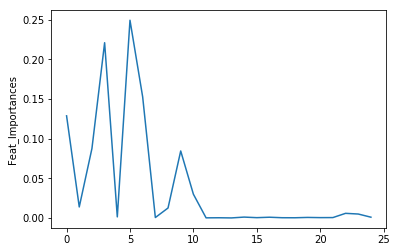

In [82]:
plt.plot(feat_import)
plt.ylabel('Feat_Importances')
plt.show()

In [84]:
#The number of features when fit is performed.
best_rf.n_features_

25

In [89]:
predictions = best_rf.predict(X_test)

In [90]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      2145
          1       0.95      0.88      0.92       669

avg / total       0.96      0.96      0.96      2814



In [91]:
confusion_matrix(y_true= y_test, y_pred = predictions)

array([[2116,   29],
       [  78,  591]])

In [92]:
best_rf.predict_proba(X_test)

array([[0.3091841 , 0.6908159 ],
       [0.98584637, 0.01415363],
       [0.80858484, 0.19141516],
       ...,
       [0.99035713, 0.00964287],
       [0.94002958, 0.05997042],
       [0.88499356, 0.11500644]])

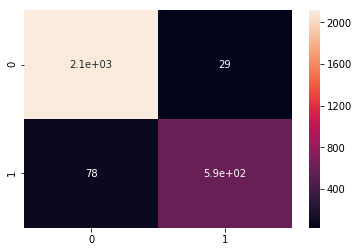

In [93]:
y_hat = best_rf.predict(X_test)

cm = confusion_matrix(y_test, y_hat)
cm = pd.DataFrame(cm)

sns.heatmap(cm, annot=True)

In [94]:
# Much higher score with random forest 

# GRADIENT BOOSTING

In [95]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

print(gb.score(X_test, y_test))

0.9673063255152807


In [96]:
GradientBoostingClassifier().get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [97]:
gb_params = {
    'learning_rate':[0.05, 0.1,0.2],
    'n_estimators':[20,100,200],
    'max_depth':[1,3,5]
}

gb_gridsearch = GridSearchCV(RandomForestClassifier(), gb_params, cv=5, verbose=1)

In [98]:
%%time
gb_gridsearch = rf_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: user 950 ms, sys: 22.2 ms, total: 972 ms
Wall time: 968 ms


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.9s finished


In [99]:
# only a little better 
gb_gridsearch.best_score_

0.9684556602097032

In [100]:
gb_gridsearch.best_params_

{'max_depth': 7, 'min_samples_split': 5}

In [101]:
predictions = gb.predict(X_test)

In [102]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.9673063255152807

In [103]:
best_gb = lr_gridsearch.best_estimator_

In [104]:
best_gb.predict_proba(X_test)

array([[0.62079875, 0.37920125],
       [0.97774447, 0.02225553],
       [0.80498544, 0.19501456],
       ...,
       [0.99799175, 0.00200825],
       [0.69527305, 0.30472695],
       [0.93246214, 0.06753786]])

In [105]:
confusion_matrix(y_true= y_test, y_pred = predictions)

array([[2111,   34],
       [  58,  611]])

In [106]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98      2145
          1       0.95      0.91      0.93       669

avg / total       0.97      0.97      0.97      2814



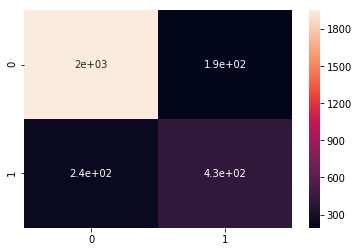

In [107]:
y_hat = best_gb.predict(X_test)

cm = confusion_matrix(y_test, y_hat)
cm = pd.DataFrame(cm)

sns.heatmap(cm, annot=True)